___

# Logistic Regression
___


___
## Imports section

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

import seaborn as sns

from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

___
## Data Exploring

### Read dataset and show head

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Info

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


### Data Describe

In [6]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Histogram on Y axis

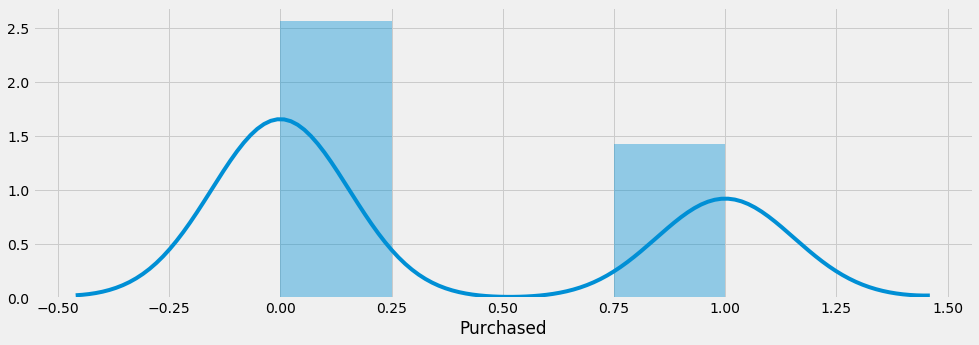

In [12]:
sns.distplot(dataset['Purchased'])

### Correlation

In [8]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


### Heatmap

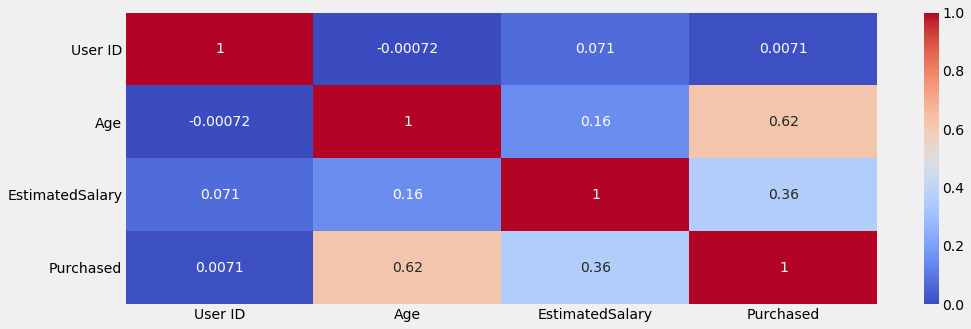

In [11]:
sns.heatmap(data=dataset.corr(),cmap='coolwarm', annot=True)

___
## Data Processing

### Separation: X (features) from Y (predict variable)

In [13]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

### Spliting the Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

### Feature Scaling

In [19]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


___
## Model Desing

### Creating and training models

In [23]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions

In [24]:
predictions = classifier.predict(X_test)

### Model Performace Analysis: Confusion Matrix

In [32]:
cm = confusion_matrix(y_true=y_test, y_pred= predictions)
df_cm =pd.DataFrame(data=cm,index=['True', 'False'], columns=['True', 'False'])
df_cm

,True,False
True,65,3
False,8,24


In [37]:
true_positive = df_cm.iloc[0,0]
false_positive = df_cm.iloc[0,1]
false_negative = df_cm.iloc[1,0]
true_negative = df_cm.iloc[1,1]
accuracy = (true_positive + true_negative)  / y_test.size
precision = true_positive / (true_positive + false_negative)
recall = true_positive / (true_positive + false_positive)
print("True Positives: " + str(true_positive))
print("True Negatives: " + str(true_negative ))
print("False Positives: " + str(false_positive))
print("False Negatives: " + str(false_negative))
print("Accuracy: {0:2f}".format(accuracy * 100) )
print("Recall: {0:2f}".format(recall * 100) )

True Positives: 65
True Negatives: 24
False Positives: 3
False Negatives: 8
Accuracy: 89.000000
Recall: 95.588235


### Evaluating Model

### Residuals

___
## Conclusion